<h1>K Nearest Neighbours<h1>

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [36]:
phones_df = pd.read_csv('../../preprocessing/smartphones_preprocessed.csv')

In [37]:
phones_df.head()

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.000000,0,...,64,6.1,60,2,ios,12.0,12.0,0,1792,828
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,bionic,6.0,2.65,3110.000000,0,...,128,6.1,60,2,ios,12.0,12.0,0,1792,828
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,bionic,6.0,2.65,3500.000000,1,...,64,6.5,60,3,ios,12.0,12.0,0,2688,1242
3,apple,Apple iPhone 12,51999,7.4,1,bionic,6.0,3.10,4817.748194,0,...,64,6.1,60,2,ios,12.0,12.0,0,2532,1170
4,apple,Apple iPhone 12 (128GB),55999,7.5,1,bionic,6.0,3.10,4817.748194,0,...,128,6.1,60,2,ios,12.0,12.0,0,2532,1170


In [38]:
phones_df.isna().any().any()

False

In [39]:
phones_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   avg_rating                 980 non-null    float64
 4   5G_or_not                  980 non-null    int64  
 5   processor_brand            980 non-null    object 
 6   num_cores                  980 non-null    float64
 7   processor_speed            980 non-null    float64
 8   battery_capacity           980 non-null    float64
 9   fast_charging_available    980 non-null    int64  
 10  fast_charging              980 non-null    float64
 11  ram_capacity               980 non-null    int64  
 12  internal_memory            980 non-null    int64  
 13  screen_size                980 non-null    float64

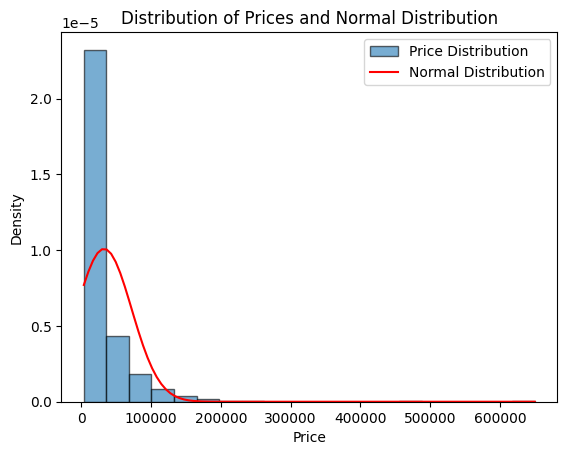

In [40]:
# Calculate mean and standard deviation of the "price" column
mean_price = phones_df['price'].mean()
std_price = phones_df['price'].std()

# Create a histogram of the "price" column
plt.hist(phones_df['price'], bins=20, density=True, alpha=0.6, edgecolor='black', label='Price Distribution')

# Create a range of values for the normal distribution
x = np.linspace(min(phones_df['price']), max(phones_df['price']), 100)
# Calculate the corresponding normal distribution values
normal_dist = np.exp(-0.5 * ((x - mean_price) / std_price)**2) / (std_price * np.sqrt(2 * np.pi))

# Plot the normal distribution curve
plt.plot(x, normal_dist, color='red', label='Normal Distribution')


plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Distribution of Prices and Normal Distribution')


plt.legend()


plt.show()

In [41]:
# the price column has positive skew
phones_df.price.skew()

6.591790999665569

In [42]:
# Define the desired ratio of phones in "low" and "high" bins
desired_ratio = 0.7
min_price = phones_df['price'].min()
max_price = phones_df['price'].max()

# Calculate the threshold price based on the desired ratio
threshold_price = phones_df['price'].quantile(desired_ratio)

# Define the bin edges for low and high based on the threshold
bin_edges = [min_price, threshold_price, max_price]

# Define labels for the bins
labels = ['low', 'high']

# Apply the calculated bins to the "price" column
phones_df['price_category'] = pd.cut(phones_df['price'], bins=bin_edges, labels=labels)
phones_df['price_category'].fillna('high', inplace=True)
phones_df.head()

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width,price_category
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.000000,0,...,6.1,60,2,ios,12.0,12.0,0,1792,828,high
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,bionic,6.0,2.65,3110.000000,0,...,6.1,60,2,ios,12.0,12.0,0,1792,828,high
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,bionic,6.0,2.65,3500.000000,1,...,6.5,60,3,ios,12.0,12.0,0,2688,1242,high
3,apple,Apple iPhone 12,51999,7.4,1,bionic,6.0,3.10,4817.748194,0,...,6.1,60,2,ios,12.0,12.0,0,2532,1170,high
4,apple,Apple iPhone 12 (128GB),55999,7.5,1,bionic,6.0,3.10,4817.748194,0,...,6.1,60,2,ios,12.0,12.0,0,2532,1170,high


In [43]:
threshold_price

30296.299999999956

In [44]:
unique_os_values = phones_df['os'].unique()
print(unique_os_values)

['ios' 'android' 'other']


In [45]:
phones_df_encoded = pd.get_dummies(phones_df, columns=['os'], prefix='os')

In [46]:
phones_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   brand_name                 980 non-null    object  
 1   model                      980 non-null    object  
 2   price                      980 non-null    int64   
 3   avg_rating                 980 non-null    float64 
 4   5G_or_not                  980 non-null    int64   
 5   processor_brand            980 non-null    object  
 6   num_cores                  980 non-null    float64 
 7   processor_speed            980 non-null    float64 
 8   battery_capacity           980 non-null    float64 
 9   fast_charging_available    980 non-null    int64   
 10  fast_charging              980 non-null    float64 
 11  ram_capacity               980 non-null    int64   
 12  internal_memory            980 non-null    int64   
 13  screen_size                980 non-

In [47]:
# Define X (input features) and Y (target)
X = phones_df_encoded.drop(columns=['price', 'price_category', 'brand_name', 'model', 'processor_brand'])
Y = phones_df_encoded['price_category']
feature_names = X.columns

In [48]:
Y.unique()

['high', 'low']
Categories (2, object): ['low' < 'high']

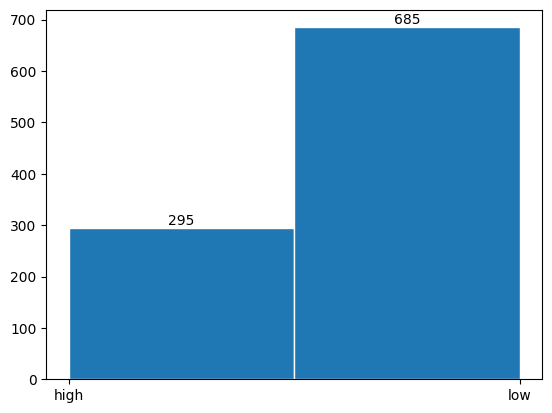

In [49]:
import numpy as np

freq, bins, _ = plt.hist(Y, edgecolor='white', bins=2)

bin_centers = np.diff(bins)*0.5 + bins[:-1] # računanje centra korpice

for fr, x in zip(freq, bin_centers):
    height = int(fr)
    plt.annotate("{}".format(height),
               xy = (x, height),             # poziciranje broja iznad korpice
               xytext = (0,0.2),             # odvajanje teksta od korpice
               textcoords = "offset points", 
               ha = 'center', va = 'bottom'
               )

plt.show()

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
# Splitting the data into testing and training sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=41)

In [52]:
# Report function - copied from
# https://github.com/MATF-istrazivanje-podataka-1/materijali_2022-2023/blob/main/05/Najblizi_susedi.ipynb

def IQR(data, feature_names):
    
    iqr = pd.DataFrame(0, index=feature_names, columns=['lower', 'min', 'num_lower', 'upper', 'max', 'num_upper', 'percantage'])
    for name in feature_names:

        (Q1, Q3) = X[name].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        upper = Q3 + (1.5 * IQR)
        lower = Q1 - (1.5 * IQR)
        
        iqr.loc[name, 'upper'] = upper
        iqr.loc[name, 'lower'] = lower

        num_of_out_lower = (X[name] < lower).sum()
        num_of_out_upper = (X[name] > upper).sum()

        percentage = round((num_of_out_lower + num_of_out_upper) / X.shape[0] * 100)

        iqr.loc[name, 'num_lower'], iqr.loc[name, 'num_upper'], iqr.loc[name, 'percantage']  = num_of_out_lower, num_of_out_upper, percentage
        iqr.loc[name, 'min'], iqr.loc[name, 'max'] = min(X[name]), max(X[name])    
    return iqr

In [53]:
IQR(X_train, feature_names)

,lower,min,num_lower,upper,max,num_upper,percantage
avg_rating,6.150,6.00,27,9.750,8.90,0,3
5G_or_not,-1.500,0.00,0,2.500,1.00,0,0
num_cores,8.000,4.00,81,8.000,8.00,0,8
processor_speed,0.865,1.20,0,4.025,3.22,0,0
battery_capacity,3750.000,1821.00,59,5750.000,22000.00,70,13
fast_charging_available,1.000,0.00,143,1.000,1.00,0,15
fast_charging,-60.000,0.00,0,140.000,240.00,13,1
ram_capacity,-2.000,1.00,0,14.000,18.00,11,1
internal_memory,-32.000,8.00,0,224.000,1024.00,184,19
screen_size,6.245,3.54,91,6.925,8.03,22,12


In [60]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
# !pip install termcolor
from sklearn.metrics import classification_report
from termcolor import colored

def report(model, x, y, text = "training"):
    y_pred = model.predict(x)
    
    print(colored("Classification report for model {} on {} data".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(classification_report(y, y_pred, zero_division=True))
    print("---------------------------------------------------------------------------------")
    
    print(colored("Confusion matrix for model {} on {} data ".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(pd.DataFrame(confusion_matrix(y, y_pred), columns=['high', 'low'], index=['high', 'low']))
    print("---------------------------------------------------------------------------------")

In [62]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier()

In [63]:
knn.fit(X_train, Y_train) # treninranje modela

KNeighborsClassifier()

In [64]:
Y_pred = knn.predict(X_test)

In [65]:
report(knn, X_train, Y_train)

Classification report for model KNeighborsClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

        high       0.91      0.81      0.86       219
         low       0.92      0.97      0.95       516

    accuracy                           0.92       735
   macro avg       0.92      0.89      0.90       735
weighted avg       0.92      0.92      0.92       735

---------------------------------------------------------------------------------
Confusion matrix for model KNeighborsClassifier on training data 
---------------------------------------------------------------------------------
      high  low
high   178   41
low     17  499
---------------------------------------------------------------------------------


In [66]:
report(knn, X_test, Y_test, "test")

Classification report for model KNeighborsClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

        high       0.94      0.79      0.86        76
         low       0.91      0.98      0.94       169

    accuracy                           0.92       245
   macro avg       0.92      0.88      0.90       245
weighted avg       0.92      0.92      0.92       245

---------------------------------------------------------------------------------
Confusion matrix for model KNeighborsClassifier on test data 
---------------------------------------------------------------------------------
      high  low
high    60   16
low      4  165
---------------------------------------------------------------------------------


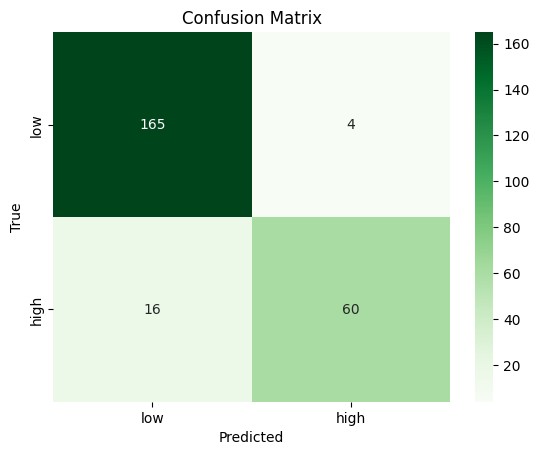

In [67]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(Y_test, Y_pred, labels=labels)

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [68]:
cm

array([[165,   4],
       [ 16,  60]], dtype=int64)

In [69]:
# gini: measures impurity by calculating the probability of misclassifying a randomly chosen data point in that node
# entropy: measures impurity by calculating the entropy of the class
# This model will try both criterions to decide on how to split the decision tree

# The grid search will also try different values of the maximum depth of the decision tree (2, 4, 6, 8)
params = {'criterion': ['gini', 'entropy'], 
          'max_depth': [2, 4, 6, 8]
         }

params_grid = {'n_neighbors': range(10, 50, 5),
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30],
    'metric': ['euclidean', 'manhattan', 'minkowski']}

In [70]:
from sklearn.model_selection import GridSearchCV

estimator = GridSearchCV(KNeighborsClassifier(), params_grid, cv=6, verbose=4)
estimator.fit(X_train, Y_train)

Fitting 6 folds for each of 1152 candidates, totalling 6912 fits
[CV 1/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=10, p=1, weights=uniform;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=10, p=1, weights=uniform;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=10, p=1, weights=uniform;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=10, p=1, weights=uniform;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=10, p=1, weights=uniform;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=10, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=10, p=1, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algo

[CV 5/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=20, p=2, weights=uniform;, score=0.902 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=20, p=2, weights=uniform;, score=0.820 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=20, p=2, weights=distance;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=20, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=20, p=2, weights=distance;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=20, p=2, weights=distance;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=20, p=2, weights=distance;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=20, p

[CV 2/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=35, p=2, weights=uniform;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=35, p=2, weights=uniform;, score=0.837 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=35, p=2, weights=uniform;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=35, p=2, weights=uniform;, score=0.902 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=35, p=2, weights=uniform;, score=0.820 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=35, p=2, weights=distance;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=35, p=2, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=35, p=2,

[CV 6/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=10, p=1, weights=distance;, score=0.852 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=10, p=2, weights=uniform;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=10, p=2, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=10, p=2, weights=uniform;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=10, p=2, weights=uniform;, score=0.836 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=10, p=2, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=10, p=2, weights=uniform;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=10, p=2, 

[CV 2/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=25, p=1, weights=distance;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=25, p=1, weights=distance;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=25, p=1, weights=distance;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=25, p=1, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=25, p=1, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=25, p=2, weights=uniform;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=25, p=2, weights=uniform;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=25, p

[CV 2/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=40, p=1, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=40, p=1, weights=uniform;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=40, p=1, weights=uniform;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=40, p=1, weights=uniform;, score=0.902 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=40, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=40, p=1, weights=distance;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=40, p=1, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=40, p=1,

[CV 5/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=10, p=2, weights=uniform;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=10, p=2, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=10, p=2, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=10, p=2, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=10, p=2, weights=distance;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=10, p=2, weights=distance;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=10, p=2, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=10, p

[CV 3/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=25, p=1, weights=distance;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=25, p=1, weights=distance;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=25, p=1, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=25, p=1, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=25, p=2, weights=uniform;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=25, p=2, weights=uniform;, score=0.870 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=25, p=2, weights=uniform;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=25, p=

[CV 3/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=40, p=1, weights=uniform;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=40, p=1, weights=uniform;, score=0.861 total time=   0.1s
[CV 5/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=40, p=1, weights=uniform;, score=0.902 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=40, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=40, p=1, weights=distance;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=40, p=1, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=40, p=1, weights=distance;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=40, p=1

[CV 3/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=10, p=2, weights=distance;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=10, p=2, weights=distance;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=10, p=2, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=10, p=2, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=15, p=1, weights=uniform;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=15, p=1, weights=uniform;, score=0.862 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=15, p=1, weights=uniform;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=15, p=

[CV 4/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=25, p=2, weights=uniform;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=25, p=2, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=25, p=2, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=25, p=2, weights=distance;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=25, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=25, p=2, weights=distance;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=25, p=2, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=25, p=

[CV 1/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=40, p=2, weights=uniform;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=40, p=2, weights=uniform;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=40, p=2, weights=uniform;, score=0.829 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=40, p=2, weights=uniform;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=40, p=2, weights=uniform;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=40, p=2, weights=uniform;, score=0.820 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=40, p=2, weights=distance;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=40, p=2, 

[CV 4/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=15, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=15, p=1, weights=uniform;, score=0.902 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=15, p=1, weights=uniform;, score=0.820 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=15, p=1, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=15, p=1, weights=distance;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=15, p=1, weights=distance;, score=0.886 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=15, p=1, weights=distance;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=15, p=

[CV 6/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=25, p=2, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=30, p=1, weights=uniform;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=30, p=1, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=30, p=1, weights=uniform;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=30, p=1, weights=uniform;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=30, p=1, weights=uniform;, score=0.893 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=30, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=30, p=1, 

[CV 6/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=40, p=2, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=40, p=2, weights=distance;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=40, p=2, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=40, p=2, weights=distance;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=40, p=2, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=40, p=2, weights=distance;, score=0.926 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=40, p=2, weights=distance;, score=0.861 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=45, 

[CV 4/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=15, p=1, weights=distance;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=15, p=1, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=15, p=1, weights=distance;, score=0.852 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=15, p=2, weights=uniform;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=15, p=2, weights=uniform;, score=0.862 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=15, p=2, weights=uniform;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=15, p=2, weights=uniform;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=15, p=2

[CV 6/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=30, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=30, p=1, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=30, p=1, weights=distance;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=30, p=1, weights=distance;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=30, p=1, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=30, p=1, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=30, p=1, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=30, 

[CV 1/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=45, p=1, weights=uniform;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=45, p=1, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=45, p=1, weights=uniform;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=45, p=1, weights=uniform;, score=0.877 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=45, p=1, weights=uniform;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=45, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=45, p=1, weights=distance;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=45, p=1, 

[CV 6/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=15, p=2, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=15, p=2, weights=distance;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=15, p=2, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=15, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=15, p=2, weights=distance;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=15, p=2, weights=distance;, score=0.926 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=15, p=2, weights=distance;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=20, 

[CV 3/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=30, p=1, weights=distance;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=30, p=1, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=30, p=1, weights=distance;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=30, p=1, weights=distance;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=30, p=2, weights=uniform;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=30, p=2, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=30, p=2, weights=uniform;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=30, p=

[CV 2/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=45, p=1, weights=uniform;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=45, p=1, weights=uniform;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=45, p=1, weights=uniform;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=45, p=1, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=45, p=1, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=45, p=1, weights=distance;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=45, p=1, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=45, p=1,

[CV 5/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=15, p=2, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=15, p=2, weights=distance;, score=0.852 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=20, p=1, weights=uniform;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=20, p=1, weights=uniform;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=20, p=1, weights=uniform;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=20, p=1, weights=uniform;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=20, p=1, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=20, p=1,

[CV 3/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=30, p=2, weights=distance;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=30, p=2, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=30, p=2, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=30, p=2, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=35, p=1, weights=uniform;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=35, p=1, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=35, p=1, weights=uniform;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=35, p=

[CV 2/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=45, p=2, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=45, p=2, weights=uniform;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=45, p=2, weights=uniform;, score=0.877 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=45, p=2, weights=uniform;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=45, p=2, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=45, p=2, weights=distance;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=45, p=2, weights=distance;, score=0.902 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=45, p=2,

[CV 3/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=20, p=1, weights=distance;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=20, p=1, weights=distance;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=20, p=1, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=20, p=1, weights=distance;, score=0.852 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=20, p=2, weights=uniform;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=20, p=2, weights=uniform;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=20, p=2, weights=uniform;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=20, p=

[CV 1/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=35, p=1, weights=uniform;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=35, p=1, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=35, p=1, weights=uniform;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=35, p=1, weights=uniform;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=35, p=1, weights=uniform;, score=0.885 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=35, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=35, p=1, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=35, p=1, 

[CV 4/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=45, p=2, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=45, p=2, weights=distance;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=45, p=2, weights=distance;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=10, p=1, weights=uniform;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=10, p=1, weights=uniform;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=10, p=1, weights=uniform;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=10, p=1, weights=uniform;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=10, metric=eucli

[CV 4/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=20, p=2, weights=distance;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=20, p=2, weights=distance;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=20, p=2, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=25, p=1, weights=uniform;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=25, p=1, weights=uniform;, score=0.870 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=25, p=1, weights=uniform;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=25, p=1, weights=uniform;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=1

[CV 1/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=35, p=2, weights=distance;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=35, p=2, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=35, p=2, weights=distance;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=35, p=2, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=35, p=2, weights=distance;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=35, p=2, weights=distance;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=40, p=1, weights=uniform;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_siz

[CV 2/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=10, p=2, weights=distance;, score=0.902 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=10, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=10, p=2, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=10, p=2, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=10, p=2, weights=distance;, score=0.852 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=15, p=1, weights=uniform;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=15, p=1, weights=uniform;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size

[CV 5/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=25, p=1, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=25, p=1, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=25, p=2, weights=uniform;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=25, p=2, weights=uniform;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=25, p=2, weights=uniform;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=25, p=2, weights=uniform;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=25, p=2, weights=uniform;, score=0.893 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=10

[CV 3/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=40, p=1, weights=distance;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=40, p=1, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=40, p=1, weights=distance;, score=0.926 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=40, p=1, weights=distance;, score=0.861 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=40, p=2, weights=uniform;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=40, p=2, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=40, p=2, weights=uniform;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=

[CV 1/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=15, p=1, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=15, p=1, weights=distance;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=15, p=1, weights=distance;, score=0.886 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=15, p=1, weights=distance;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=15, p=1, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=15, p=1, weights=distance;, score=0.852 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=15, p=2, weights=uniform;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_siz

[CV 4/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=25, p=2, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=25, p=2, weights=distance;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=25, p=2, weights=distance;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=30, p=1, weights=uniform;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=30, p=1, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=30, p=1, weights=uniform;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=30, p=1, weights=uniform;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=1

[CV 2/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=40, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=40, p=2, weights=distance;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=40, p=2, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=40, p=2, weights=distance;, score=0.926 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=40, p=2, weights=distance;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=45, p=1, weights=uniform;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=45, p=1, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size

[CV 1/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=15, p=2, weights=distance;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=15, p=2, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=15, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=15, p=2, weights=distance;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=15, p=2, weights=distance;, score=0.926 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=15, p=2, weights=distance;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=20, p=1, weights=uniform;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_siz

[CV 2/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=1, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=1, weights=distance;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=1, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=1, weights=distance;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=1, weights=distance;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=2, weights=uniform;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=2, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size

[CV 3/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=45, p=1, weights=uniform;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=45, p=1, weights=uniform;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=45, p=1, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=45, p=1, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=45, p=1, weights=distance;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=45, p=1, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=45, p=1, weights=distance;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=2

[CV 5/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=15, p=2, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=15, p=2, weights=distance;, score=0.852 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=20, p=1, weights=uniform;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=20, p=1, weights=uniform;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=20, p=1, weights=uniform;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=20, p=1, weights=uniform;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=20, p=1, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=20

[CV 2/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=30, p=2, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=30, p=2, weights=uniform;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=30, p=2, weights=uniform;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=30, p=2, weights=uniform;, score=0.893 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=30, p=2, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=30, p=2, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=30, p=2, weights=distance;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=20

[CV 3/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=45, p=1, weights=uniform;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=45, p=1, weights=uniform;, score=0.877 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=45, p=1, weights=uniform;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=45, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=45, p=1, weights=distance;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=45, p=1, weights=distance;, score=0.902 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=45, p=1, weights=distance;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=2

[CV 2/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=15, p=2, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=15, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=15, p=2, weights=distance;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=15, p=2, weights=distance;, score=0.926 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=15, p=2, weights=distance;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=20, p=1, weights=uniform;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=20, p=1, weights=uniform;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size

[CV 4/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=30, p=1, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=30, p=1, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=30, p=1, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=30, p=2, weights=uniform;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=30, p=2, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=30, p=2, weights=uniform;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=30, p=2, weights=uniform;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=2

[CV 1/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=45, p=1, weights=distance;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=45, p=1, weights=distance;, score=0.902 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=45, p=1, weights=distance;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=45, p=1, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=45, p=1, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=45, p=1, weights=distance;, score=0.852 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=45, p=2, weights=uniform;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_siz

[CV 6/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=15, p=2, weights=distance;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=20, p=1, weights=uniform;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=20, p=1, weights=uniform;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=20, p=1, weights=uniform;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=20, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=20, p=1, weights=uniform;, score=0.902 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=20, p=1, weights=uniform;, score=0.820 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=30,

[CV 3/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=30, p=2, weights=uniform;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=30, p=2, weights=uniform;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=30, p=2, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=30, p=2, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=30, p=2, weights=distance;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=30, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=30, p=2, weights=distance;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=3

[CV 4/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=45, p=1, weights=uniform;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=45, p=1, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=45, p=1, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=45, p=1, weights=distance;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=45, p=1, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=45, p=1, weights=distance;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=45, p=1, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=

[CV 2/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=15, p=2, weights=distance;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=15, p=2, weights=distance;, score=0.886 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=15, p=2, weights=distance;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=15, p=2, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=15, p=2, weights=distance;, score=0.852 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=20, p=1, weights=uniform;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=20, p=1, weights=uniform;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size

[CV 4/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=30, p=1, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=30, p=1, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=30, p=1, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=30, p=2, weights=uniform;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=30, p=2, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=30, p=2, weights=uniform;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=30, p=2, weights=uniform;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=3

[CV 3/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=45, p=1, weights=distance;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=45, p=1, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=45, p=1, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=45, p=1, weights=distance;, score=0.852 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=45, p=2, weights=uniform;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=45, p=2, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=45, p=2, weights=uniform;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=

[CV 2/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=20, p=1, weights=uniform;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=20, p=1, weights=uniform;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=20, p=1, weights=uniform;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=20, p=1, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=20, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=20, p=1, weights=distance;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=20, p=1, weights=distance;, score=0.902 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=30

[CV 5/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=30, p=2, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=30, p=2, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=30, p=2, weights=distance;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=30, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=30, p=2, weights=distance;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=30, p=2, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=30, p=2, weights=distance;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size

[CV 6/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=45, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=45, p=1, weights=distance;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=45, p=1, weights=distance;, score=0.902 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=45, p=1, weights=distance;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=45, p=1, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=45, p=1, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=45, p=1, weights=distance;, score=0.852 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_siz

[CV 4/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=20, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=20, p=1, weights=uniform;, score=0.902 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=20, p=1, weights=uniform;, score=0.820 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=20, p=1, weights=distance;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=20, p=1, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=20, p=1, weights=distance;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=20, p=1, weights=distance;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=10, metric=eucli

[CV 1/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=30, p=2, weights=distance;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=30, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=30, p=2, weights=distance;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=30, p=2, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=30, p=2, weights=distance;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=30, p=2, weights=distance;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=35, p=1, weights=uniform;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=10, metric=euc

[CV 5/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=45, p=1, weights=distance;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=45, p=1, weights=distance;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=45, p=2, weights=uniform;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=45, p=2, weights=uniform;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=45, p=2, weights=uniform;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=45, p=2, weights=uniform;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=45, p=2, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=10, metric=euclide

[CV 6/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=20, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=20, p=1, weights=distance;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=20, p=1, weights=distance;, score=0.902 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=20, p=1, weights=distance;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=20, p=1, weights=distance;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=20, p=1, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=20, p=1, weights=distance;, score=0.852 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=10, metric=man

[CV 3/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=35, p=1, weights=uniform;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=35, p=1, weights=uniform;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=35, p=1, weights=uniform;, score=0.885 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=35, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=35, p=1, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=35, p=1, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=35, p=1, weights=distance;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=10, metric=manhat

[CV 6/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=45, p=2, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=45, p=2, weights=distance;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=45, p=2, weights=distance;, score=0.902 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=45, p=2, weights=distance;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=45, p=2, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=45, p=2, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=45, p=2, weights=distance;, score=0.852 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=10, metric=min

[CV 4/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=20, p=2, weights=uniform;, score=0.836 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=20, p=2, weights=uniform;, score=0.902 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=20, p=2, weights=uniform;, score=0.820 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=20, p=2, weights=distance;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=20, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=20, p=2, weights=distance;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=20, p=2, weights=distance;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=10, metric=minko

[CV 4/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=35, p=1, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=35, p=1, weights=distance;, score=0.943 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=35, p=1, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=35, p=2, weights=uniform;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=35, p=2, weights=uniform;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=35, p=2, weights=uniform;, score=0.837 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=35, p=2, weights=uniform;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=10, metric=minkow

[CV 6/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=45, p=2, weights=distance;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=10, p=1, weights=uniform;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=10, p=1, weights=uniform;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=10, p=1, weights=uniform;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=10, p=1, weights=uniform;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=10, p=1, weights=uniform;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=10, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=20, metric=euclidea

[CV 2/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=20, p=2, weights=uniform;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=20, p=2, weights=uniform;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=20, p=2, weights=uniform;, score=0.836 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=20, p=2, weights=uniform;, score=0.902 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=20, p=2, weights=uniform;, score=0.820 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=20, p=2, weights=distance;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=20, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=20, metric=euclide

[CV 2/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=35, p=2, weights=uniform;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=35, p=2, weights=uniform;, score=0.837 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=35, p=2, weights=uniform;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=35, p=2, weights=uniform;, score=0.902 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=35, p=2, weights=uniform;, score=0.820 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=35, p=2, weights=distance;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=35, p=2, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=20, metric=euclide

[CV 5/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=10, p=1, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=10, p=1, weights=distance;, score=0.852 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=10, p=2, weights=uniform;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=10, p=2, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=10, p=2, weights=uniform;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=10, p=2, weights=uniform;, score=0.836 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=10, p=2, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=20, metric=manhatt

[CV 6/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=20, p=2, weights=distance;, score=0.852 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=25, p=1, weights=uniform;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=25, p=1, weights=uniform;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=25, p=1, weights=uniform;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=25, p=1, weights=uniform;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=25, p=1, weights=uniform;, score=0.893 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=25, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=20, metric=manhatta

[CV 3/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=35, p=2, weights=distance;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=35, p=2, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=35, p=2, weights=distance;, score=0.943 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=35, p=2, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=40, p=1, weights=uniform;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=40, p=1, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=40, p=1, weights=uniform;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=20, metric=manha

[CV 1/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=10, p=2, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=10, p=2, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=10, p=2, weights=distance;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=10, p=2, weights=distance;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=10, p=2, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=10, p=2, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=15, p=1, weights=uniform;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=20, metric=min

[CV 6/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=25, p=2, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=25, p=2, weights=distance;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=25, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=25, p=2, weights=distance;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=25, p=2, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=25, p=2, weights=distance;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=25, p=2, weights=distance;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=20, metric=min

[CV 5/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=40, p=2, weights=uniform;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=40, p=2, weights=uniform;, score=0.820 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=40, p=2, weights=distance;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=40, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=40, p=2, weights=distance;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=40, p=2, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=40, p=2, weights=distance;, score=0.926 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=20, metric=mink

[CV 5/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=15, p=2, weights=uniform;, score=0.893 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=15, p=2, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=15, p=2, weights=distance;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=15, p=2, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=15, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=15, p=2, weights=distance;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=15, p=2, weights=distance;, score=0.926 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=30, metric=eucl

[CV 6/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=30, p=1, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=30, p=1, weights=distance;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=30, p=1, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=30, p=1, weights=distance;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=30, p=1, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=30, p=1, weights=distance;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=30, p=1, weights=distance;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=30, metric=euc

[CV 4/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=45, p=1, weights=uniform;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=45, p=1, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=45, p=1, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=45, p=1, weights=distance;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=45, p=1, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=45, p=1, weights=distance;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=45, p=1, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=30, metric=eucli

[CV 5/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=15, p=2, weights=uniform;, score=0.902 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=15, p=2, weights=uniform;, score=0.820 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=15, p=2, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=15, p=2, weights=distance;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=15, p=2, weights=distance;, score=0.886 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=15, p=2, weights=distance;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=15, p=2, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=30, metric=manh

[CV 6/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=30, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=30, p=1, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=30, p=1, weights=distance;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=30, p=1, weights=distance;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=30, p=1, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=30, p=1, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=30, p=1, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=30, metric=man

[CV 6/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=45, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=45, p=1, weights=distance;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=45, p=1, weights=distance;, score=0.902 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=45, p=1, weights=distance;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=45, p=1, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=45, p=1, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=45, p=1, weights=distance;, score=0.852 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=30, metric=man

[CV 1/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=15, p=2, weights=distance;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=15, p=2, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=15, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=15, p=2, weights=distance;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=15, p=2, weights=distance;, score=0.926 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=15, p=2, weights=distance;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=20, p=1, weights=uniform;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=30, metric=min

[CV 5/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=30, p=2, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=30, p=2, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=30, p=2, weights=distance;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=30, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=30, p=2, weights=distance;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=30, p=2, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=30, p=2, weights=distance;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=30, metric=mink

[CV 2/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=45, p=2, weights=uniform;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=45, p=2, weights=uniform;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=45, p=2, weights=uniform;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=45, p=2, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=45, p=2, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=45, p=2, weights=distance;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=45, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=30, metric=minkows

[CV 5/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=20, p=1, weights=distance;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=20, p=1, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=20, p=2, weights=uniform;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=20, p=2, weights=uniform;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=20, p=2, weights=uniform;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=20, p=2, weights=uniform;, score=0.836 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=20, p=2, weights=uniform;, score=0.902 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=

[CV 3/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=35, p=1, weights=uniform;, score=0.837 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=35, p=1, weights=uniform;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=35, p=1, weights=uniform;, score=0.902 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=35, p=1, weights=uniform;, score=0.820 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=35, p=1, weights=distance;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=35, p=1, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=35, p=1, weights=distance;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors

[CV 1/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=45, p=2, weights=distance;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=45, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=45, p=2, weights=distance;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=45, p=2, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=45, p=2, weights=distance;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=45, p=2, weights=distance;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=10, p=1, weights=uniform;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighb

[CV 4/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=20, p=2, weights=uniform;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=20, p=2, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=20, p=2, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=20, p=2, weights=distance;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=20, p=2, weights=distance;, score=0.902 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=20, p=2, weights=distance;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=20, p=2, weights=distance;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbor

[CV 4/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=35, p=1, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=35, p=1, weights=distance;, score=0.943 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=35, p=1, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=35, p=2, weights=uniform;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=35, p=2, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=35, p=2, weights=uniform;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=35, p=2, weights=uniform;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors

[CV 2/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=10, p=1, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=10, p=1, weights=uniform;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=10, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=10, p=1, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=10, p=1, weights=uniform;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=10, p=1, weights=distance;, score=0.943 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=10, p=1, weights=distance;, score=0.902 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=

[CV 6/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=20, p=2, weights=uniform;, score=0.820 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=20, p=2, weights=distance;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=20, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=20, p=2, weights=distance;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=20, p=2, weights=distance;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=20, p=2, weights=distance;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=20, p=2, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighb

[CV 1/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=35, p=2, weights=uniform;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=35, p=2, weights=uniform;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=35, p=2, weights=uniform;, score=0.837 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=35, p=2, weights=uniform;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=35, p=2, weights=uniform;, score=0.902 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=35, p=2, weights=uniform;, score=0.820 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=35, p=2, weights=distance;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=3

[CV 4/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=10, p=1, weights=uniform;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=10, p=1, weights=uniform;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=10, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=10, p=1, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=10, p=1, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=10, p=1, weights=distance;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=10, p=1, weights=distance;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbor

[CV 2/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=20, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=20, p=2, weights=distance;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=20, p=2, weights=distance;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=20, p=2, weights=distance;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=20, p=2, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=25, p=1, weights=uniform;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=25, p=1, weights=uniform;, score=0.870 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbo

[CV 5/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=35, p=1, weights=distance;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=35, p=1, weights=distance;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=35, p=2, weights=uniform;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=35, p=2, weights=uniform;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=35, p=2, weights=uniform;, score=0.837 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=35, p=2, weights=uniform;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=35, p=2, weights=uniform;, score=0.902 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=

[CV 4/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=10, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=10, p=1, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=10, p=1, weights=uniform;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=10, p=1, weights=distance;, score=0.943 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=10, p=1, weights=distance;, score=0.902 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=10, p=1, weights=distance;, score=0.878 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=10, p=1, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbor

[CV 4/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=20, p=2, weights=distance;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=20, p=2, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=20, p=2, weights=distance;, score=0.852 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=25, p=1, weights=uniform;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=25, p=1, weights=uniform;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=25, p=1, weights=uniform;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=25, p=1, weights=uniform;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors

[CV 6/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=35, p=1, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=35, p=2, weights=uniform;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=35, p=2, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=35, p=2, weights=uniform;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=35, p=2, weights=uniform;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=35, p=2, weights=uniform;, score=0.885 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=35, p=2, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=3

[CV 2/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=10, p=1, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=10, p=1, weights=uniform;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=10, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=10, p=1, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=10, p=1, weights=uniform;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=10, p=1, weights=distance;, score=0.943 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=10, p=1, weights=distance;, score=0.902 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=

[CV 5/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=20, p=2, weights=uniform;, score=0.902 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=20, p=2, weights=uniform;, score=0.820 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=20, p=2, weights=distance;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=20, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=20, p=2, weights=distance;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=20, p=2, weights=distance;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=20, p=2, weights=distance;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbo

[CV 5/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=35, p=1, weights=distance;, score=0.943 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=35, p=1, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=35, p=2, weights=uniform;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=35, p=2, weights=uniform;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=35, p=2, weights=uniform;, score=0.837 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=35, p=2, weights=uniform;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=35, p=2, weights=uniform;, score=0.902 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=

[CV 1/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=10, p=1, weights=uniform;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=10, p=1, weights=uniform;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=10, p=1, weights=uniform;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=10, p=1, weights=uniform;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=10, p=1, weights=uniform;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=10, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=10, p=1, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=1

[CV 3/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=20, p=2, weights=uniform;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=20, p=2, weights=uniform;, score=0.836 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=20, p=2, weights=uniform;, score=0.902 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=20, p=2, weights=uniform;, score=0.820 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=20, p=2, weights=distance;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=20, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=20, p=2, weights=distance;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors

[CV 6/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=35, p=1, weights=uniform;, score=0.820 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=35, p=1, weights=distance;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=35, p=1, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=35, p=1, weights=distance;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=35, p=1, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=35, p=1, weights=distance;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=35, p=1, weights=distance;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighb

[CV 4/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=10, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=10, p=1, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=10, p=1, weights=uniform;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=10, p=1, weights=distance;, score=0.943 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=10, p=1, weights=distance;, score=0.902 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=10, p=1, weights=distance;, score=0.878 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=10, p=1, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbor

[CV 1/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=20, p=2, weights=distance;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=20, p=2, weights=distance;, score=0.902 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=20, p=2, weights=distance;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=20, p=2, weights=distance;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=20, p=2, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=20, p=2, weights=distance;, score=0.852 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=25, p=1, weights=uniform;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighb

[CV 2/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=35, p=2, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=35, p=2, weights=uniform;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=35, p=2, weights=uniform;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=35, p=2, weights=uniform;, score=0.885 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=35, p=2, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=35, p=2, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=35, p=2, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=

[CV 5/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=10, p=1, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=10, p=1, weights=uniform;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=10, p=1, weights=distance;, score=0.943 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=10, p=1, weights=distance;, score=0.902 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=10, p=1, weights=distance;, score=0.878 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=10, p=1, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=10, p=1, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbo

[CV 2/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=25, p=1, weights=uniform;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=25, p=1, weights=uniform;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=25, p=1, weights=uniform;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=25, p=1, weights=uniform;, score=0.893 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=25, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=25, p=1, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=25, p=1, weights=distance;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=

[CV 5/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=35, p=2, weights=uniform;, score=0.902 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=35, p=2, weights=uniform;, score=0.820 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=35, p=2, weights=distance;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=35, p=2, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=35, p=2, weights=distance;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=35, p=2, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=35, p=2, weights=distance;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbo

GridSearchCV(cv=6, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30],
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(10, 50, 5), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=4)

In [71]:
Y_pred = estimator.predict(X_test)

In [72]:
estimator.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'metric': 'manhattan',
 'n_neighbors': 10,
 'p': 1,
 'weights': 'distance'}

In [73]:
estimator.best_score_

0.8951863698964858

In [74]:
report(estimator.best_estimator_, X_train, Y_train)

Classification report for model KNeighborsClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

        high       1.00      1.00      1.00       219
         low       1.00      1.00      1.00       516

    accuracy                           1.00       735
   macro avg       1.00      1.00      1.00       735
weighted avg       1.00      1.00      1.00       735

---------------------------------------------------------------------------------
Confusion matrix for model KNeighborsClassifier on training data 
---------------------------------------------------------------------------------
      high  low
high   218    1
low      0  516
---------------------------------------------------------------------------------


In [75]:
report(estimator.best_estimator_, X_test, Y_test, "test")

Classification report for model KNeighborsClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

        high       0.93      0.82      0.87        76
         low       0.92      0.97      0.95       169

    accuracy                           0.92       245
   macro avg       0.92      0.89      0.91       245
weighted avg       0.92      0.92      0.92       245

---------------------------------------------------------------------------------
Confusion matrix for model KNeighborsClassifier on test data 
---------------------------------------------------------------------------------
      high  low
high    62   14
low      5  164
---------------------------------------------------------------------------------


In [76]:
estimator.cv_results_

{'mean_fit_time': array([0.0036176 , 0.00480481, 0.00381513, ..., 0.0041796 , 0.00281922,
        0.00547179]),
 'std_fit_time': array([0.00123247, 0.00092783, 0.00122752, ..., 0.00108651, 0.00133514,
        0.0009514 ]),
 'mean_score_time': array([0.03701091, 0.02160656, 0.03145285, ..., 0.02417584, 0.03021542,
        0.0272843 ]),
 'std_score_time': array([0.00382242, 0.0010958 , 0.00460509, ..., 0.00172825, 0.00563028,
        0.00132647]),
 'param_algorithm': masked_array(data=['auto', 'auto', 'auto', ..., 'brute', 'brute', 'brute'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_leaf_size': masked_array(data=[10, 10, 10, ..., 30, 30, 30],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_metric': masked_array(data=['euclidean', 'euclidean', 'euclidean', ...,
                    'minkowski', 'minkowski', 'minkowski'],
     

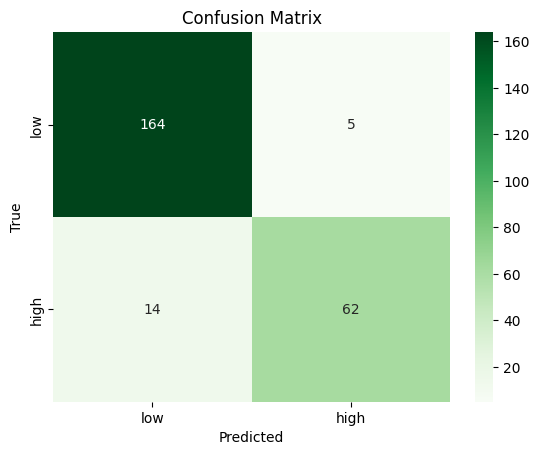

In [77]:
# Generate confusion matrix
cm = confusion_matrix(Y_test, Y_pred, labels=labels)

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [78]:
from sklearn.metrics import roc_curve, auc

In [79]:
models = [knn, estimator]
model_names = ["KNN", "GridSearchCV"]
colors = ["blue", "red"]

Fitting 6 folds for each of 1152 candidates, totalling 6912 fits
[CV 1/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=10, p=1, weights=uniform;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=10, p=1, weights=uniform;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=10, p=1, weights=uniform;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=10, p=1, weights=uniform;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=10, p=1, weights=uniform;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=10, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=10, p=1, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algo

[CV 3/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=20, p=2, weights=uniform;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=20, p=2, weights=uniform;, score=0.836 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=20, p=2, weights=uniform;, score=0.902 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=20, p=2, weights=uniform;, score=0.820 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=20, p=2, weights=distance;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=20, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=20, p=2, weights=distance;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=20, p=2

[CV 1/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=35, p=1, weights=distance;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=35, p=1, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=35, p=1, weights=distance;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=35, p=1, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=35, p=1, weights=distance;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=35, p=1, weights=distance;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=35, p=2, weights=uniform;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=35, 

[CV 4/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=45, p=2, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=45, p=2, weights=distance;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=45, p=2, weights=distance;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=10, p=1, weights=uniform;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=10, p=1, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=10, p=1, weights=uniform;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=10, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=10, p=1

[CV 3/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=20, p=2, weights=uniform;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=20, p=2, weights=uniform;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=20, p=2, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=20, p=2, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=20, p=2, weights=distance;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=20, p=2, weights=distance;, score=0.902 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=20, p=2, weights=distance;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=20, p=2

[CV 6/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=35, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=35, p=1, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=35, p=1, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=35, p=1, weights=distance;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=35, p=1, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=35, p=1, weights=distance;, score=0.943 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=35, p=1, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=35, 

[CV 1/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=10, p=1, weights=uniform;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=10, p=1, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=10, p=1, weights=uniform;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=10, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=10, p=1, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=10, p=1, weights=uniform;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=10, p=1, weights=distance;, score=0.943 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=10, p=1, 

[CV 3/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=20, p=2, weights=distance;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=20, p=2, weights=distance;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=20, p=2, weights=distance;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=20, p=2, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=25, p=1, weights=uniform;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=25, p=1, weights=uniform;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=25, p=1, weights=uniform;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=25, p=

[CV 6/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=35, p=2, weights=uniform;, score=0.820 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=35, p=2, weights=distance;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=35, p=2, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=35, p=2, weights=distance;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=35, p=2, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=35, p=2, weights=distance;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=35, p=2, weights=distance;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=40, 

[CV 1/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=10, p=2, weights=uniform;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=10, p=2, weights=uniform;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=10, p=2, weights=uniform;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=10, p=2, weights=uniform;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=10, p=2, weights=uniform;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=10, p=2, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=10, p=2, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=10, p=2, 

[CV 6/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=25, p=1, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=25, p=1, weights=distance;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=25, p=1, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=25, p=1, weights=distance;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=25, p=1, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=25, p=1, weights=distance;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=25, p=1, weights=distance;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=25, 

[CV 5/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=35, p=2, weights=distance;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=35, p=2, weights=distance;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=40, p=1, weights=uniform;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=40, p=1, weights=uniform;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=40, p=1, weights=uniform;, score=0.829 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=40, p=1, weights=uniform;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=40, p=1, weights=uniform;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=40, p=1,

[CV 4/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=10, p=2, weights=uniform;, score=0.836 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=10, p=2, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=10, p=2, weights=uniform;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=10, p=2, weights=distance;, score=0.943 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=10, p=2, weights=distance;, score=0.902 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=10, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=10, p=2, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=10, p=

[CV 1/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=25, p=1, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=25, p=1, weights=distance;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=25, p=1, weights=distance;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=25, p=1, weights=distance;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=25, p=1, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=25, p=1, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=25, p=2, weights=uniform;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=25, 

[CV 1/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=40, p=1, weights=uniform;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=40, p=1, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=40, p=1, weights=uniform;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=40, p=1, weights=uniform;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=40, p=1, weights=uniform;, score=0.902 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=40, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=40, p=1, weights=distance;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=40, p=1, 

[CV 2/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=10, p=2, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=10, p=2, weights=distance;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=10, p=2, weights=distance;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=10, p=2, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=10, p=2, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=15, p=1, weights=uniform;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=15, p=1, weights=uniform;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=15, p

[CV 2/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=25, p=2, weights=uniform;, score=0.870 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=25, p=2, weights=uniform;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=25, p=2, weights=uniform;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=25, p=2, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=25, p=2, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=25, p=2, weights=distance;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=25, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=25, p=2,

[CV 5/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=40, p=1, weights=uniform;, score=0.902 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=40, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=40, p=1, weights=distance;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=40, p=1, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=40, p=1, weights=distance;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=40, p=1, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=40, p=1, weights=distance;, score=0.926 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=40, p

[CV 6/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=10, p=2, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=15, p=1, weights=uniform;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=15, p=1, weights=uniform;, score=0.862 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=15, p=1, weights=uniform;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=15, p=1, weights=uniform;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=15, p=1, weights=uniform;, score=0.893 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=15, p=1, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=15, p=1, 

[CV 6/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=25, p=2, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=25, p=2, weights=distance;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=25, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=25, p=2, weights=distance;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=25, p=2, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=25, p=2, weights=distance;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=25, p=2, weights=distance;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=30, 

[CV 6/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=40, p=1, weights=distance;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=40, p=2, weights=uniform;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=40, p=2, weights=uniform;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=40, p=2, weights=uniform;, score=0.829 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=40, p=2, weights=uniform;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=40, p=2, weights=uniform;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=40, p=2, weights=uniform;, score=0.820 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=40, p=2, 

[CV 6/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=15, p=1, weights=uniform;, score=0.820 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=15, p=1, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=15, p=1, weights=distance;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=15, p=1, weights=distance;, score=0.886 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=15, p=1, weights=distance;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=15, p=1, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=15, p=1, weights=distance;, score=0.852 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=15, 

[CV 2/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=30, p=1, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=30, p=1, weights=uniform;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=30, p=1, weights=uniform;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=30, p=1, weights=uniform;, score=0.893 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=30, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=30, p=1, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=30, p=1, weights=distance;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=30, p=1,

[CV 5/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=40, p=2, weights=distance;, score=0.926 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=40, p=2, weights=distance;, score=0.861 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=45, p=1, weights=uniform;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=45, p=1, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=45, p=1, weights=uniform;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=45, p=1, weights=uniform;, score=0.877 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=45, p=1, weights=uniform;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=45, p=1,

[CV 2/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=15, p=2, weights=uniform;, score=0.862 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=15, p=2, weights=uniform;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=15, p=2, weights=uniform;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=15, p=2, weights=uniform;, score=0.893 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=15, p=2, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=15, p=2, weights=distance;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=15, p=2, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=15, p=2,

[CV 4/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=30, p=1, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=30, p=1, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=30, p=1, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=30, p=2, weights=uniform;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=30, p=2, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=30, p=2, weights=uniform;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=30, p=2, weights=uniform;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=30, p=2

[CV 4/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=45, p=1, weights=uniform;, score=0.877 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=45, p=1, weights=uniform;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=45, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=45, p=1, weights=distance;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=45, p=1, weights=distance;, score=0.902 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=45, p=1, weights=distance;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=45, p=1, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=45, p=

[CV 1/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=15, p=2, weights=distance;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=15, p=2, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=15, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=15, p=2, weights=distance;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=15, p=2, weights=distance;, score=0.926 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=15, p=2, weights=distance;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=20, p=1, weights=uniform;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_siz

[CV 1/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=30, p=2, weights=uniform;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=30, p=2, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=30, p=2, weights=uniform;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=30, p=2, weights=uniform;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=30, p=2, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=30, p=2, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=30, p=2, weights=distance;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=10,

[CV 3/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=45, p=1, weights=uniform;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=45, p=1, weights=uniform;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=45, p=1, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=45, p=1, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=45, p=1, weights=distance;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=45, p=1, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=45, p=1, weights=distance;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=1

[CV 1/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=15, p=2, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=15, p=2, weights=distance;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=15, p=2, weights=distance;, score=0.886 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=15, p=2, weights=distance;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=15, p=2, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=15, p=2, weights=distance;, score=0.852 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=20, p=1, weights=uniform;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_siz

[CV 5/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=30, p=1, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=30, p=1, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=30, p=2, weights=uniform;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=30, p=2, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=30, p=2, weights=uniform;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=30, p=2, weights=uniform;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=30, p=2, weights=uniform;, score=0.893 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=10

[CV 1/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=45, p=1, weights=uniform;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=45, p=1, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=45, p=1, weights=uniform;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=45, p=1, weights=uniform;, score=0.877 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=45, p=1, weights=uniform;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=45, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=45, p=1, weights=distance;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=10,

[CV 5/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=15, p=2, weights=uniform;, score=0.893 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=15, p=2, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=15, p=2, weights=distance;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=15, p=2, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=15, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=15, p=2, weights=distance;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=15, p=2, weights=distance;, score=0.926 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size

[CV 4/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=30, p=1, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=30, p=1, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=30, p=1, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=30, p=2, weights=uniform;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=30, p=2, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=30, p=2, weights=uniform;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=30, p=2, weights=uniform;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=1

[CV 6/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=40, p=2, weights=distance;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=45, p=1, weights=uniform;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=45, p=1, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=45, p=1, weights=uniform;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=45, p=1, weights=uniform;, score=0.877 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=45, p=1, weights=uniform;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=45, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=10,

[CV 5/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=15, p=2, weights=uniform;, score=0.893 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=15, p=2, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=15, p=2, weights=distance;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=15, p=2, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=15, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=15, p=2, weights=distance;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=15, p=2, weights=distance;, score=0.926 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size

[CV 1/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=2, weights=uniform;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=2, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=2, weights=uniform;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=2, weights=uniform;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=2, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=2, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=2, weights=distance;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=20,

[CV 3/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=45, p=1, weights=uniform;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=45, p=1, weights=uniform;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=45, p=1, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=45, p=1, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=45, p=1, weights=distance;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=45, p=1, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=45, p=1, weights=distance;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=2

[CV 6/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=15, p=2, weights=distance;, score=0.852 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=20, p=1, weights=uniform;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=20, p=1, weights=uniform;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=20, p=1, weights=uniform;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=20, p=1, weights=uniform;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=20, p=1, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=20, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=20,

[CV 6/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=30, p=2, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=30, p=2, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=30, p=2, weights=distance;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=30, p=2, weights=distance;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=30, p=2, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=30, p=2, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=30, p=2, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_siz

[CV 5/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=45, p=1, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=45, p=1, weights=distance;, score=0.852 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=45, p=2, weights=uniform;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=45, p=2, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=45, p=2, weights=uniform;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=45, p=2, weights=uniform;, score=0.877 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=45, p=2, weights=uniform;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=20

[CV 6/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=20, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=20, p=1, weights=distance;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=20, p=1, weights=distance;, score=0.902 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=20, p=1, weights=distance;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=20, p=1, weights=distance;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=20, p=1, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=20, p=1, weights=distance;, score=0.852 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_siz

[CV 1/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=35, p=1, weights=uniform;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=35, p=1, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=35, p=1, weights=uniform;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=35, p=1, weights=uniform;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=35, p=1, weights=uniform;, score=0.885 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=35, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=35, p=1, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=20,

[CV 4/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=45, p=2, weights=uniform;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=45, p=2, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=45, p=2, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=45, p=2, weights=distance;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=45, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=45, p=2, weights=distance;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=45, p=2, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=

[CV 6/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=20, p=1, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=20, p=2, weights=uniform;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=20, p=2, weights=uniform;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=20, p=2, weights=uniform;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=20, p=2, weights=uniform;, score=0.836 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=20, p=2, weights=uniform;, score=0.902 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=20, p=2, weights=uniform;, score=0.820 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=30,

[CV 6/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=35, p=1, weights=uniform;, score=0.820 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=35, p=1, weights=distance;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=35, p=1, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=35, p=1, weights=distance;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=35, p=1, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=35, p=1, weights=distance;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=35, p=1, weights=distance;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_siz

[CV 2/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=45, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=45, p=2, weights=distance;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=45, p=2, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=45, p=2, weights=distance;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=45, p=2, weights=distance;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=10, p=1, weights=uniform;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=10, p=1, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size

[CV 6/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=20, p=2, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=20, p=2, weights=distance;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=20, p=2, weights=distance;, score=0.902 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=20, p=2, weights=distance;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=20, p=2, weights=distance;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=20, p=2, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=20, p=2, weights=distance;, score=0.852 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_siz

[CV 1/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=35, p=2, weights=uniform;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=35, p=2, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=35, p=2, weights=uniform;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=35, p=2, weights=uniform;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=35, p=2, weights=uniform;, score=0.885 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=35, p=2, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=35, p=2, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=30,

[CV 3/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=10, p=1, weights=uniform;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=10, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=10, p=1, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=10, p=1, weights=uniform;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=10, p=1, weights=distance;, score=0.943 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=10, p=1, weights=distance;, score=0.902 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=10, p=1, weights=distance;, score=0.878 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=3

[CV 3/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=20, p=2, weights=distance;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=20, p=2, weights=distance;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=20, p=2, weights=distance;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=20, p=2, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=25, p=1, weights=uniform;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=25, p=1, weights=uniform;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=25, p=1, weights=uniform;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=

[CV 2/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=35, p=2, weights=uniform;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=35, p=2, weights=uniform;, score=0.837 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=35, p=2, weights=uniform;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=35, p=2, weights=uniform;, score=0.902 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=35, p=2, weights=uniform;, score=0.820 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=35, p=2, weights=distance;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=35, p=2, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=30

[CV 3/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=10, p=1, weights=uniform;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=10, p=1, weights=uniform;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=10, p=1, weights=uniform;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=10, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=10, p=1, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=10, p=1, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=10, p=1, weights=distance;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=10, metric=euclid

[CV 2/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=25, p=1, weights=uniform;, score=0.870 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=25, p=1, weights=uniform;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=25, p=1, weights=uniform;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=25, p=1, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=25, p=1, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=25, p=1, weights=distance;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=25, p=1, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=10, metric=euclide

[CV 3/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=35, p=2, weights=distance;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=35, p=2, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=35, p=2, weights=distance;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=35, p=2, weights=distance;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=40, p=1, weights=uniform;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=40, p=1, weights=uniform;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=40, p=1, weights=uniform;, score=0.829 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=10, metric=eucli

[CV 3/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=10, p=2, weights=uniform;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=10, p=2, weights=uniform;, score=0.836 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=10, p=2, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=10, p=2, weights=uniform;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=10, p=2, weights=distance;, score=0.943 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=10, p=2, weights=distance;, score=0.902 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=10, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=10, metric=manhat

[CV 6/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=25, p=1, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=25, p=2, weights=uniform;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=25, p=2, weights=uniform;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=25, p=2, weights=uniform;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=25, p=2, weights=uniform;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=25, p=2, weights=uniform;, score=0.893 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=25, p=2, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=10, metric=manhatta

[CV 1/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=40, p=1, weights=distance;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=40, p=1, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=40, p=1, weights=distance;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=40, p=1, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=40, p=1, weights=distance;, score=0.926 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=40, p=1, weights=distance;, score=0.861 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=40, p=2, weights=uniform;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=10, metric=man

[CV 6/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=15, p=1, weights=uniform;, score=0.820 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=15, p=1, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=15, p=1, weights=distance;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=15, p=1, weights=distance;, score=0.886 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=15, p=1, weights=distance;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=15, p=1, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=15, p=1, weights=distance;, score=0.852 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=10, metric=min

[CV 5/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=30, p=1, weights=uniform;, score=0.893 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=30, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=30, p=1, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=30, p=1, weights=distance;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=30, p=1, weights=distance;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=30, p=1, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=30, p=1, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=10, metric=mink

[CV 1/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=45, p=1, weights=uniform;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=45, p=1, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=45, p=1, weights=uniform;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=45, p=1, weights=uniform;, score=0.877 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=45, p=1, weights=uniform;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=45, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=45, p=1, weights=distance;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=10, metric=minkowsk

[CV 4/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=15, p=2, weights=uniform;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=15, p=2, weights=uniform;, score=0.893 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=15, p=2, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=15, p=2, weights=distance;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=15, p=2, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=15, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=15, p=2, weights=distance;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=20, metric=eucli

[CV 2/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=1, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=1, weights=distance;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=1, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=1, weights=distance;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=1, weights=distance;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=2, weights=uniform;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=2, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=20, metric=eucl

[CV 6/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=45, p=1, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=45, p=1, weights=distance;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=45, p=1, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=45, p=1, weights=distance;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=45, p=1, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=45, p=1, weights=distance;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=45, p=1, weights=distance;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=20, metric=euc

[CV 1/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=20, p=1, weights=uniform;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=20, p=1, weights=uniform;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=20, p=1, weights=uniform;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=20, p=1, weights=uniform;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=20, p=1, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=20, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=20, p=1, weights=distance;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=20, metric=manhatta

[CV 6/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=30, p=2, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=30, p=2, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=30, p=2, weights=distance;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=30, p=2, weights=distance;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=30, p=2, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=30, p=2, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=30, p=2, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=20, metric=man

[CV 6/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=45, p=2, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=45, p=2, weights=distance;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=45, p=2, weights=distance;, score=0.902 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=45, p=2, weights=distance;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=45, p=2, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=45, p=2, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=45, p=2, weights=distance;, score=0.852 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=20, metric=min

[CV 5/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=20, p=1, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=20, p=1, weights=distance;, score=0.852 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=20, p=2, weights=uniform;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=20, p=2, weights=uniform;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=20, p=2, weights=uniform;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=20, p=2, weights=uniform;, score=0.836 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=20, p=2, weights=uniform;, score=0.902 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=20, metric=minkows

[CV 1/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=35, p=1, weights=uniform;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=35, p=1, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=35, p=1, weights=uniform;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=35, p=1, weights=uniform;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=35, p=1, weights=uniform;, score=0.885 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=35, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=35, p=1, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=20, metric=minkowsk

[CV 2/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=45, p=2, weights=uniform;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=45, p=2, weights=uniform;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=45, p=2, weights=uniform;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=45, p=2, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=45, p=2, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=45, p=2, weights=distance;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=45, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=20, metric=minkows

[CV 1/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=20, p=1, weights=distance;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=20, p=1, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=20, p=1, weights=distance;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=20, p=1, weights=distance;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=20, p=1, weights=distance;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=20, p=1, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=20, p=2, weights=uniform;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=30, metric=euc

[CV 2/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=30, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=30, p=2, weights=distance;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=30, p=2, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=30, p=2, weights=distance;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=30, p=2, weights=distance;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=35, p=1, weights=uniform;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=35, p=1, weights=uniform;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=30, metric=eucl

[CV 6/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=45, p=2, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=45, p=2, weights=distance;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=45, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=45, p=2, weights=distance;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=45, p=2, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=45, p=2, weights=distance;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=45, p=2, weights=distance;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=30, metric=man

[CV 2/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=20, p=2, weights=uniform;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=20, p=2, weights=uniform;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=20, p=2, weights=uniform;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=20, p=2, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=20, p=2, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=20, p=2, weights=distance;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=20, p=2, weights=distance;, score=0.902 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=30, metric=manhatt

[CV 4/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=35, p=1, weights=uniform;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=35, p=1, weights=uniform;, score=0.885 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=35, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=35, p=1, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=35, p=1, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=35, p=1, weights=distance;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=35, p=1, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=30, metric=manha

[CV 4/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=10, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=10, p=1, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=10, p=1, weights=uniform;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=10, p=1, weights=distance;, score=0.943 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=10, p=1, weights=distance;, score=0.902 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=10, p=1, weights=distance;, score=0.878 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=10, p=1, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=30, metric=minko

[CV 2/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=20, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=20, p=2, weights=distance;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=20, p=2, weights=distance;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=20, p=2, weights=distance;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=20, p=2, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=25, p=1, weights=uniform;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=25, p=1, weights=uniform;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=30, metric=mink

[CV 4/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=35, p=1, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=35, p=1, weights=distance;, score=0.943 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=35, p=1, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=35, p=2, weights=uniform;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=35, p=2, weights=uniform;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=35, p=2, weights=uniform;, score=0.837 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=35, p=2, weights=uniform;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=30, metric=minkow

[CV 6/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=10, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=10, p=1, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=10, p=1, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=10, p=1, weights=distance;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=10, p=1, weights=distance;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=10, p=1, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=10, p=1, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighb

[CV 1/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=25, p=1, weights=uniform;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=25, p=1, weights=uniform;, score=0.870 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=25, p=1, weights=uniform;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=25, p=1, weights=uniform;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=25, p=1, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=25, p=1, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=25, p=1, weights=distance;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=2

[CV 5/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=35, p=2, weights=uniform;, score=0.902 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=35, p=2, weights=uniform;, score=0.820 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=35, p=2, weights=distance;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=35, p=2, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=35, p=2, weights=distance;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=35, p=2, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=35, p=2, weights=distance;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbo

[CV 2/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=10, p=1, weights=distance;, score=0.902 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=10, p=1, weights=distance;, score=0.878 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=10, p=1, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=10, p=1, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=10, p=1, weights=distance;, score=0.852 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=10, p=2, weights=uniform;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=10, p=2, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbo

[CV 2/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=25, p=1, weights=uniform;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=25, p=1, weights=uniform;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=25, p=1, weights=uniform;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=25, p=1, weights=uniform;, score=0.893 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=25, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=25, p=1, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=25, p=1, weights=distance;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=

[CV 4/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=35, p=2, weights=uniform;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=35, p=2, weights=uniform;, score=0.885 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=35, p=2, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=35, p=2, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=35, p=2, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=35, p=2, weights=distance;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=35, p=2, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbor

[CV 6/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=10, p=1, weights=uniform;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=10, p=1, weights=distance;, score=0.943 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=10, p=1, weights=distance;, score=0.902 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=10, p=1, weights=distance;, score=0.878 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=10, p=1, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=10, p=1, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=10, p=1, weights=distance;, score=0.852 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighb

[CV 5/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=20, p=2, weights=distance;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=20, p=2, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=25, p=1, weights=uniform;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=25, p=1, weights=uniform;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=25, p=1, weights=uniform;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=25, p=1, weights=uniform;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=25, p=1, weights=uniform;, score=0.893 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=

[CV 5/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=35, p=2, weights=uniform;, score=0.902 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=35, p=2, weights=uniform;, score=0.820 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=35, p=2, weights=distance;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=35, p=2, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=35, p=2, weights=distance;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=35, p=2, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=35, p=2, weights=distance;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbo

[CV 1/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=10, p=2, weights=uniform;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=10, p=2, weights=uniform;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=10, p=2, weights=uniform;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=10, p=2, weights=uniform;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=10, p=2, weights=uniform;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=10, p=2, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=10, p=2, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=1

[CV 1/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=25, p=1, weights=distance;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=25, p=1, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=25, p=1, weights=distance;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=25, p=1, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=25, p=1, weights=distance;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=25, p=1, weights=distance;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=25, p=2, weights=uniform;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighb

[CV 5/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=35, p=2, weights=distance;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=35, p=2, weights=distance;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=40, p=1, weights=uniform;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=40, p=1, weights=uniform;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=40, p=1, weights=uniform;, score=0.829 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=40, p=1, weights=uniform;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=40, p=1, weights=uniform;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=

[CV 6/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=10, p=2, weights=uniform;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=10, p=2, weights=distance;, score=0.943 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=10, p=2, weights=distance;, score=0.902 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=10, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=10, p=2, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=10, p=2, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=10, p=2, weights=distance;, score=0.852 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighb

[CV 2/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=25, p=1, weights=distance;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=25, p=1, weights=distance;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=25, p=1, weights=distance;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=25, p=1, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=25, p=1, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=25, p=2, weights=uniform;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=25, p=2, weights=uniform;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbo

[CV 4/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=40, p=1, weights=uniform;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=40, p=1, weights=uniform;, score=0.902 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=40, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=40, p=1, weights=distance;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=40, p=1, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=40, p=1, weights=distance;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=40, p=1, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbor

[CV 6/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=10, p=2, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=15, p=1, weights=uniform;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=15, p=1, weights=uniform;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=15, p=1, weights=uniform;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=15, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=15, p=1, weights=uniform;, score=0.902 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=15, p=1, weights=uniform;, score=0.820 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=1

[CV 4/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=25, p=2, weights=uniform;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=25, p=2, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=25, p=2, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=25, p=2, weights=distance;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=25, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=25, p=2, weights=distance;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=25, p=2, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbor

[CV 1/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=40, p=2, weights=uniform;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=40, p=2, weights=uniform;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=40, p=2, weights=uniform;, score=0.829 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=40, p=2, weights=uniform;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=40, p=2, weights=uniform;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=40, p=2, weights=uniform;, score=0.820 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=40, p=2, weights=distance;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=4

[CV 3/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=15, p=1, weights=distance;, score=0.878 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=15, p=1, weights=distance;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=15, p=1, weights=distance;, score=0.926 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=15, p=1, weights=distance;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=15, p=2, weights=uniform;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=15, p=2, weights=uniform;, score=0.862 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=15, p=2, weights=uniform;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbor

[CV 1/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=30, p=1, weights=uniform;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=30, p=1, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=30, p=1, weights=uniform;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=30, p=1, weights=uniform;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=30, p=1, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=30, p=1, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=30, p=1, weights=distance;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=3

[CV 3/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=40, p=2, weights=distance;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=40, p=2, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=40, p=2, weights=distance;, score=0.926 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=40, p=2, weights=distance;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=45, p=1, weights=uniform;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=45, p=1, weights=uniform;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=45, p=1, weights=uniform;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbor

[CV 2/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=15, p=2, weights=uniform;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=15, p=2, weights=uniform;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=15, p=2, weights=uniform;, score=0.836 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=15, p=2, weights=uniform;, score=0.902 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=15, p=2, weights=uniform;, score=0.820 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=15, p=2, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=15, p=2, weights=distance;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=

[CV 5/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=30, p=1, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=30, p=1, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=30, p=2, weights=uniform;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=30, p=2, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=30, p=2, weights=uniform;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=30, p=2, weights=uniform;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=30, p=2, weights=uniform;, score=0.893 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=

[CV 3/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=45, p=1, weights=uniform;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=45, p=1, weights=uniform;, score=0.877 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=45, p=1, weights=uniform;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=45, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=45, p=1, weights=distance;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=45, p=1, weights=distance;, score=0.902 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=45, p=1, weights=distance;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors

[CV 6/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=15, p=2, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=15, p=2, weights=distance;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=15, p=2, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=15, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=15, p=2, weights=distance;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=15, p=2, weights=distance;, score=0.926 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=15, p=2, weights=distance;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighb

[CV 6/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=30, p=1, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=30, p=2, weights=uniform;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=30, p=2, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=30, p=2, weights=uniform;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=30, p=2, weights=uniform;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=30, p=2, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=30, p=2, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=3

[CV 2/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=45, p=1, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=45, p=1, weights=uniform;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=45, p=1, weights=uniform;, score=0.877 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=45, p=1, weights=uniform;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=45, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=45, p=1, weights=distance;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=45, p=1, weights=distance;, score=0.902 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=

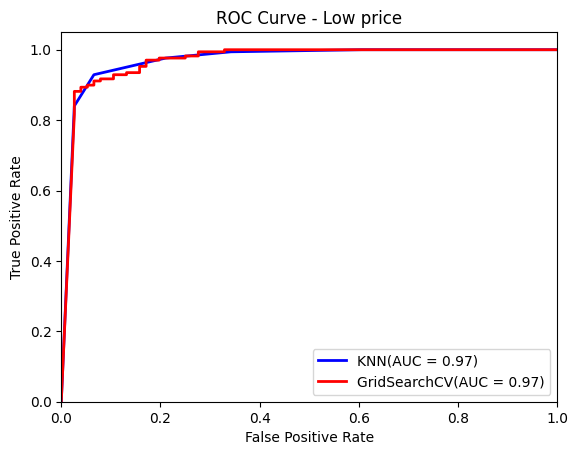

In [80]:
# Choose Low-rated as the positive class
pos_class = "low" 

# Combine the other two classes into a single negative class
neg_class = "high"

# Convert labels to binary format
y_train_bin = (Y_train == pos_class).astype(int)
y_test_bin = (Y_test == pos_class).astype(int)

plt.figure()
for model, model_name, color in zip(models, model_names, colors):
    # Train a classifier on the training data
    model.fit(X_train, y_train_bin)
    
    # Make predictions on the test data
    y_pred = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and area under the curve (AUC)
    fpr, tpr, _ = roc_curve(y_test_bin, y_pred)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, color=color, lw=2, label= model_name +'(AUC = %0.2f)' % roc_auc)
    

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Low price')
plt.legend(loc="lower right")
plt.show()

Fitting 6 folds for each of 1152 candidates, totalling 6912 fits
[CV 1/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=10, p=1, weights=uniform;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=10, p=1, weights=uniform;, score=0.862 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=10, p=1, weights=uniform;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=10, p=1, weights=uniform;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=10, p=1, weights=uniform;, score=0.902 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=10, p=1, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=10, p=1, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algo

[CV 6/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=25, p=1, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=25, p=1, weights=distance;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=25, p=1, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=25, p=1, weights=distance;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=25, p=1, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=25, p=1, weights=distance;, score=0.926 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=25, p=1, weights=distance;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=25, 

[CV 5/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=40, p=1, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=40, p=1, weights=distance;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=40, p=2, weights=uniform;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=40, p=2, weights=uniform;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=40, p=2, weights=uniform;, score=0.837 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=40, p=2, weights=uniform;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=40, p=2, weights=uniform;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=40, p=2,

[CV 2/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=15, p=2, weights=distance;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=15, p=2, weights=distance;, score=0.894 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=15, p=2, weights=distance;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=15, p=2, weights=distance;, score=0.943 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=15, p=2, weights=distance;, score=0.852 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=20, p=1, weights=uniform;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=20, p=1, weights=uniform;, score=0.870 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=20, p

[CV 4/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=35, p=1, weights=uniform;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=35, p=1, weights=uniform;, score=0.885 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=35, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=35, p=1, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=35, p=1, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=35, p=1, weights=distance;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=35, p=1, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=35, p=

[CV 3/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=45, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=45, p=2, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=45, p=2, weights=distance;, score=0.943 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=45, p=2, weights=distance;, score=0.852 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=10, p=1, weights=uniform;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=10, p=1, weights=uniform;, score=0.870 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=10, p=1, weights=uniform;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=10, p=

[CV 3/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=25, p=1, weights=distance;, score=0.878 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=25, p=1, weights=distance;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=25, p=1, weights=distance;, score=0.943 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=25, p=1, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=25, p=2, weights=uniform;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=25, p=2, weights=uniform;, score=0.870 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=25, p=2, weights=uniform;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=25, p=

[CV 5/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=40, p=2, weights=uniform;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=40, p=2, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=40, p=2, weights=distance;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=40, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=40, p=2, weights=distance;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=40, p=2, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=40, p=2, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=40, p

[CV 2/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=20, p=1, weights=uniform;, score=0.854 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=20, p=1, weights=uniform;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=20, p=1, weights=uniform;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=20, p=1, weights=uniform;, score=0.902 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=20, p=1, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=20, p=1, weights=distance;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=20, p=1, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=20, p=1,

[CV 2/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=35, p=1, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=35, p=1, weights=distance;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=35, p=1, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=35, p=1, weights=distance;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=35, p=1, weights=distance;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=35, p=2, weights=uniform;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=35, p=2, weights=uniform;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=35, p

[CV 2/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=10, p=2, weights=uniform;, score=0.870 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=10, p=2, weights=uniform;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=10, p=2, weights=uniform;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=10, p=2, weights=uniform;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=10, p=2, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=10, p=2, weights=distance;, score=0.943 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=10, p=2, weights=distance;, score=0.902 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=10, p=2,

[CV 3/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=25, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=25, p=2, weights=distance;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=25, p=2, weights=distance;, score=0.943 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=25, p=2, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=30, p=1, weights=uniform;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=30, p=1, weights=uniform;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=30, p=1, weights=uniform;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=30, p=

[CV 2/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=45, p=1, weights=distance;, score=0.902 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=45, p=1, weights=distance;, score=0.878 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=45, p=1, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=45, p=1, weights=distance;, score=0.943 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=45, p=1, weights=distance;, score=0.852 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=45, p=2, weights=uniform;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=45, p=2, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=45, p

[CV 1/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=20, p=2, weights=distance;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=20, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=20, p=2, weights=distance;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=20, p=2, weights=distance;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=20, p=2, weights=distance;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=20, p=2, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=25, p=1, weights=uniform;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=25, 

[CV 6/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=40, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=40, p=1, weights=distance;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=40, p=1, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=40, p=1, weights=distance;, score=0.878 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=40, p=1, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=40, p=1, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=40, p=1, weights=distance;, score=0.861 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=40, 

[CV 2/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=15, p=2, weights=uniform;, score=0.862 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=15, p=2, weights=uniform;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=15, p=2, weights=uniform;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=15, p=2, weights=uniform;, score=0.893 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=15, p=2, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=15, p=2, weights=distance;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=15, p=2, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=15, p=2,

[CV 6/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=30, p=2, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=30, p=2, weights=distance;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=30, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=30, p=2, weights=distance;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=30, p=2, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=30, p=2, weights=distance;, score=0.926 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=30, p=2, weights=distance;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=35, 

[CV 4/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=45, p=2, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=45, p=2, weights=distance;, score=0.926 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=45, p=2, weights=distance;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=10, p=1, weights=uniform;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=10, p=1, weights=uniform;, score=0.870 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=10, p=1, weights=uniform;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=10, p=1, weights=uniform;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=10, p=1

[CV 2/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=20, p=2, weights=uniform;, score=0.870 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=20, p=2, weights=uniform;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=20, p=2, weights=uniform;, score=0.836 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=20, p=2, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=20, p=2, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=20, p=2, weights=distance;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=20, p=2, weights=distance;, score=0.902 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=20, p=2,

[CV 1/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=40, p=1, weights=uniform;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=40, p=1, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=40, p=1, weights=uniform;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=40, p=1, weights=uniform;, score=0.877 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=40, p=1, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=40, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=40, p=1, weights=distance;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=40, p=1, 

[CV 1/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=15, p=2, weights=uniform;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=15, p=2, weights=uniform;, score=0.862 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=15, p=2, weights=uniform;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=15, p=2, weights=uniform;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=15, p=2, weights=uniform;, score=0.893 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=15, p=2, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=15, p=2, weights=distance;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=15, p=2, 

[CV 4/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=30, p=2, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=30, p=2, weights=distance;, score=0.926 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=30, p=2, weights=distance;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=35, p=1, weights=uniform;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=35, p=1, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=35, p=1, weights=uniform;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=35, p=1, weights=uniform;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=35, p=1

[CV 4/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=10, p=1, weights=uniform;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=10, p=1, weights=uniform;, score=0.902 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=10, p=1, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=10, p=1, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=10, p=1, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=10, p=1, weights=distance;, score=0.878 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=10, p=1, weights=distance;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=

[CV 1/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=25, p=1, weights=uniform;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=25, p=1, weights=uniform;, score=0.870 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=25, p=1, weights=uniform;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=25, p=1, weights=uniform;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=25, p=1, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=25, p=1, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=25, p=1, weights=distance;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=10,

[CV 4/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=35, p=2, weights=uniform;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=35, p=2, weights=uniform;, score=0.902 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=35, p=2, weights=uniform;, score=0.820 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=35, p=2, weights=distance;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=35, p=2, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=35, p=2, weights=distance;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=35, p=2, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=

[CV 4/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=10, p=1, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=10, p=1, weights=distance;, score=0.943 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=10, p=1, weights=distance;, score=0.852 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=10, p=2, weights=uniform;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=10, p=2, weights=uniform;, score=0.870 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=10, p=2, weights=uniform;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=10, p=2, weights=uniform;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=1

[CV 1/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=25, p=1, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=25, p=1, weights=distance;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=25, p=1, weights=distance;, score=0.878 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=25, p=1, weights=distance;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=25, p=1, weights=distance;, score=0.943 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=25, p=1, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=25, p=2, weights=uniform;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_siz

[CV 5/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=40, p=1, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=40, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=40, p=1, weights=distance;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=40, p=1, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=40, p=1, weights=distance;, score=0.878 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=40, p=1, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=40, p=1, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size

[CV 5/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=10, p=2, weights=distance;, score=0.943 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=10, p=2, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=15, p=1, weights=uniform;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=15, p=1, weights=uniform;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=15, p=1, weights=uniform;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=15, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=15, p=1, weights=uniform;, score=0.902 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=10

[CV 2/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=25, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=25, p=2, weights=distance;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=25, p=2, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=25, p=2, weights=distance;, score=0.926 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=25, p=2, weights=distance;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=30, p=1, weights=uniform;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=30, p=1, weights=uniform;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size

[CV 1/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=40, p=2, weights=uniform;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=40, p=2, weights=uniform;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=40, p=2, weights=uniform;, score=0.837 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=40, p=2, weights=uniform;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=40, p=2, weights=uniform;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=40, p=2, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=40, p=2, weights=distance;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=10,

[CV 3/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=15, p=1, weights=distance;, score=0.886 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=15, p=1, weights=distance;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=15, p=1, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=15, p=1, weights=distance;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=15, p=2, weights=uniform;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=15, p=2, weights=uniform;, score=0.862 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=15, p=2, weights=uniform;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=

[CV 6/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=1, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=1, weights=distance;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=1, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=1, weights=distance;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=1, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=1, weights=distance;, score=0.926 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=1, weights=distance;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_siz

[CV 2/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=40, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=40, p=2, weights=distance;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=40, p=2, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=40, p=2, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=40, p=2, weights=distance;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=45, p=1, weights=uniform;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=45, p=1, weights=uniform;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size

[CV 4/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=15, p=2, weights=uniform;, score=0.836 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=15, p=2, weights=uniform;, score=0.902 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=15, p=2, weights=uniform;, score=0.820 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=15, p=2, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=15, p=2, weights=distance;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=15, p=2, weights=distance;, score=0.894 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=15, p=2, weights=distance;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=

[CV 5/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=30, p=1, weights=distance;, score=0.943 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=30, p=1, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=30, p=2, weights=uniform;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=30, p=2, weights=uniform;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=30, p=2, weights=uniform;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=30, p=2, weights=uniform;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=30, p=2, weights=uniform;, score=0.902 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=20

[CV 4/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=45, p=1, weights=uniform;, score=0.877 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=45, p=1, weights=uniform;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=45, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=45, p=1, weights=distance;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=45, p=1, weights=distance;, score=0.902 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=45, p=1, weights=distance;, score=0.878 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=45, p=1, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=

[CV 1/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=20, p=1, weights=uniform;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=20, p=1, weights=uniform;, score=0.870 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=20, p=1, weights=uniform;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=20, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=20, p=1, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=20, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=20, p=1, weights=distance;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=20,

[CV 4/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=30, p=2, weights=uniform;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=30, p=2, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=30, p=2, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=30, p=2, weights=distance;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=30, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=30, p=2, weights=distance;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=30, p=2, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=

[CV 2/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=45, p=1, weights=distance;, score=0.902 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=45, p=1, weights=distance;, score=0.878 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=45, p=1, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=45, p=1, weights=distance;, score=0.943 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=45, p=1, weights=distance;, score=0.852 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=45, p=2, weights=uniform;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=45, p=2, weights=uniform;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size

[CV 6/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=20, p=1, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=20, p=1, weights=distance;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=20, p=1, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=20, p=1, weights=distance;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=20, p=1, weights=distance;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=20, p=1, weights=distance;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=20, p=1, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_siz

[CV 2/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=35, p=1, weights=uniform;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=35, p=1, weights=uniform;, score=0.837 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=35, p=1, weights=uniform;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=35, p=1, weights=uniform;, score=0.902 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=35, p=1, weights=uniform;, score=0.820 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=35, p=1, weights=distance;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=35, p=1, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=30

[CV 5/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=45, p=2, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=45, p=2, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=45, p=2, weights=distance;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=45, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=45, p=2, weights=distance;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=45, p=2, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=45, p=2, weights=distance;, score=0.926 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size

[CV 3/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=20, p=2, weights=uniform;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=20, p=2, weights=uniform;, score=0.836 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=20, p=2, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=20, p=2, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=20, p=2, weights=distance;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=20, p=2, weights=distance;, score=0.902 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=20, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=3

[CV 1/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=35, p=1, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=35, p=1, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=35, p=1, weights=distance;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=35, p=1, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=35, p=1, weights=distance;, score=0.951 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=35, p=1, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=35, p=2, weights=uniform;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_siz

[CV 5/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=45, p=2, weights=distance;, score=0.943 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=45, p=2, weights=distance;, score=0.852 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=10, p=1, weights=uniform;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=10, p=1, weights=uniform;, score=0.870 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=10, p=1, weights=uniform;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=10, p=1, weights=uniform;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=10, p=1, weights=uniform;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=30

[CV 1/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=25, p=1, weights=uniform;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=25, p=1, weights=uniform;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=25, p=1, weights=uniform;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=25, p=1, weights=uniform;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=25, p=1, weights=uniform;, score=0.893 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=25, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=25, p=1, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=30,

[CV 5/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=35, p=2, weights=uniform;, score=0.902 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=35, p=2, weights=uniform;, score=0.820 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=35, p=2, weights=distance;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=35, p=2, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=35, p=2, weights=distance;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=35, p=2, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=35, p=2, weights=distance;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size

[CV 3/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=10, p=1, weights=distance;, score=0.878 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=10, p=1, weights=distance;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=10, p=1, weights=distance;, score=0.943 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=10, p=1, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=10, p=2, weights=uniform;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=10, p=2, weights=uniform;, score=0.862 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=10, p=2, weights=uniform;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=10, metric=eucli

[CV 6/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=25, p=1, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=25, p=1, weights=distance;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=25, p=1, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=25, p=1, weights=distance;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=25, p=1, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=25, p=1, weights=distance;, score=0.926 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=25, p=1, weights=distance;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=10, metric=euc

[CV 2/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=35, p=2, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=35, p=2, weights=distance;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=35, p=2, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=35, p=2, weights=distance;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=35, p=2, weights=distance;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=40, p=1, weights=uniform;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=40, p=1, weights=uniform;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=10, metric=eucl

[CV 1/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=10, p=2, weights=distance;, score=0.943 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=10, p=2, weights=distance;, score=0.902 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=10, p=2, weights=distance;, score=0.886 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=10, p=2, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=10, p=2, weights=distance;, score=0.943 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=10, p=2, weights=distance;, score=0.852 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=15, p=1, weights=uniform;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=10, metric=man

[CV 2/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=25, p=1, weights=distance;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=25, p=1, weights=distance;, score=0.878 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=25, p=1, weights=distance;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=25, p=1, weights=distance;, score=0.943 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=25, p=1, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=25, p=2, weights=uniform;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=25, p=2, weights=uniform;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=10, metric=manh

[CV 6/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=40, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=40, p=1, weights=distance;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=40, p=1, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=40, p=1, weights=distance;, score=0.878 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=40, p=1, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=40, p=1, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=40, p=1, weights=distance;, score=0.861 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=10, metric=man

[CV 5/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=15, p=1, weights=uniform;, score=0.902 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=15, p=1, weights=uniform;, score=0.820 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=15, p=1, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=15, p=1, weights=distance;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=15, p=1, weights=distance;, score=0.894 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=15, p=1, weights=distance;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=15, p=1, weights=distance;, score=0.943 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=10, metric=mink

[CV 3/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=30, p=1, weights=uniform;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=30, p=1, weights=uniform;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=30, p=1, weights=uniform;, score=0.902 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=30, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=30, p=1, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=30, p=1, weights=distance;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=30, p=1, weights=distance;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=10, metric=minkow

[CV 2/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=40, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=40, p=2, weights=distance;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=40, p=2, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=40, p=2, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=40, p=2, weights=distance;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=45, p=1, weights=uniform;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=45, p=1, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=10, metric=mink

[CV 6/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=15, p=2, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=15, p=2, weights=distance;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=15, p=2, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=15, p=2, weights=distance;, score=0.886 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=15, p=2, weights=distance;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=15, p=2, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=15, p=2, weights=distance;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=20, metric=euc

[CV 3/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=1, weights=distance;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=1, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=1, weights=distance;, score=0.926 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=1, weights=distance;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=2, weights=uniform;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=2, weights=uniform;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=2, weights=uniform;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=20, metric=eucli

[CV 4/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=40, p=2, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=40, p=2, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=40, p=2, weights=distance;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=45, p=1, weights=uniform;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=45, p=1, weights=uniform;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=45, p=1, weights=uniform;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=45, p=1, weights=uniform;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=20, metric=euclid

[CV 6/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=15, p=1, weights=distance;, score=0.852 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=15, p=2, weights=uniform;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=15, p=2, weights=uniform;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=15, p=2, weights=uniform;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=15, p=2, weights=uniform;, score=0.836 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=15, p=2, weights=uniform;, score=0.902 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=15, p=2, weights=uniform;, score=0.820 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=20, metric=manhatta

[CV 5/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=30, p=1, weights=uniform;, score=0.902 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=30, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=30, p=1, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=30, p=1, weights=distance;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=30, p=1, weights=distance;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=30, p=1, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=30, p=1, weights=distance;, score=0.943 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=20, metric=manh

[CV 6/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=40, p=2, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=40, p=2, weights=distance;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=40, p=2, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=40, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=40, p=2, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=40, p=2, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=40, p=2, weights=distance;, score=0.861 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=20, metric=man

[CV 3/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=15, p=1, weights=distance;, score=0.894 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=15, p=1, weights=distance;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=15, p=1, weights=distance;, score=0.943 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=15, p=1, weights=distance;, score=0.852 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=15, p=2, weights=uniform;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=15, p=2, weights=uniform;, score=0.862 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=15, p=2, weights=uniform;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=20, metric=minko

[CV 1/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=30, p=1, weights=uniform;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=30, p=1, weights=uniform;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=30, p=1, weights=uniform;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=30, p=1, weights=uniform;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=30, p=1, weights=uniform;, score=0.902 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=30, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=30, p=1, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=20, metric=minkowsk

[CV 1/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=45, p=1, weights=uniform;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=45, p=1, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=45, p=1, weights=uniform;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=45, p=1, weights=uniform;, score=0.877 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=45, p=1, weights=uniform;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=45, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=45, p=1, weights=distance;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=20, metric=minkowsk

[CV 4/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=15, p=2, weights=uniform;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=15, p=2, weights=uniform;, score=0.893 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=15, p=2, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=15, p=2, weights=distance;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=15, p=2, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=15, p=2, weights=distance;, score=0.886 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=15, p=2, weights=distance;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=30, metric=eucli

[CV 6/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=30, p=1, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=30, p=1, weights=distance;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=30, p=1, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=30, p=1, weights=distance;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=30, p=1, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=30, p=1, weights=distance;, score=0.926 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=30, p=1, weights=distance;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=30, metric=euc

[CV 5/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=45, p=1, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=45, p=1, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=45, p=1, weights=distance;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=45, p=1, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=45, p=1, weights=distance;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=45, p=1, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=45, p=1, weights=distance;, score=0.926 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=30, metric=eucl

[CV 4/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=15, p=2, weights=distance;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=15, p=2, weights=distance;, score=0.943 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=15, p=2, weights=distance;, score=0.852 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=20, p=1, weights=uniform;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=20, p=1, weights=uniform;, score=0.870 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=20, p=1, weights=uniform;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=20, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=30, metric=manhat

[CV 1/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=30, p=2, weights=uniform;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=30, p=2, weights=uniform;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=30, p=2, weights=uniform;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=30, p=2, weights=uniform;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=30, p=2, weights=uniform;, score=0.902 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=30, p=2, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=30, p=2, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=30, metric=manhatta

[CV 2/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=45, p=1, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=45, p=1, weights=uniform;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=45, p=1, weights=uniform;, score=0.877 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=45, p=1, weights=uniform;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=45, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=45, p=1, weights=distance;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=45, p=1, weights=distance;, score=0.902 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=30, metric=manhatt

[CV 5/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=15, p=2, weights=uniform;, score=0.893 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=15, p=2, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=15, p=2, weights=distance;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=15, p=2, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=15, p=2, weights=distance;, score=0.886 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=15, p=2, weights=distance;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=15, p=2, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=30, metric=mink

[CV 2/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=30, p=1, weights=distance;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=30, p=1, weights=distance;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=30, p=1, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=30, p=1, weights=distance;, score=0.943 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=30, p=1, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=30, p=2, weights=uniform;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=30, p=2, weights=uniform;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=30, metric=mink

[CV 2/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=45, p=1, weights=distance;, score=0.902 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=45, p=1, weights=distance;, score=0.878 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=45, p=1, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=45, p=1, weights=distance;, score=0.943 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=45, p=1, weights=distance;, score=0.852 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=45, p=2, weights=uniform;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=45, p=2, weights=uniform;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=30, metric=mink

[CV 4/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=15, p=2, weights=distance;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=15, p=2, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=15, p=2, weights=distance;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=20, p=1, weights=uniform;, score=0.886 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=20, p=1, weights=uniform;, score=0.854 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=20, p=1, weights=uniform;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=20, p=1, weights=uniform;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors

[CV 4/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=30, p=2, weights=uniform;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=30, p=2, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=30, p=2, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=30, p=2, weights=distance;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=30, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=30, p=2, weights=distance;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=30, p=2, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbor

[CV 1/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=45, p=1, weights=distance;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=45, p=1, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=45, p=1, weights=distance;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=45, p=1, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=45, p=1, weights=distance;, score=0.926 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=45, p=1, weights=distance;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=45, p=2, weights=uniform;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighb

[CV 1/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=20, p=1, weights=uniform;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=20, p=1, weights=uniform;, score=0.870 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=20, p=1, weights=uniform;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=20, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=20, p=1, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=20, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=20, p=1, weights=distance;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=2

[CV 2/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=30, p=2, weights=distance;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=30, p=2, weights=distance;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=30, p=2, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=30, p=2, weights=distance;, score=0.943 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=30, p=2, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=35, p=1, weights=uniform;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=35, p=1, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbo

[CV 4/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=45, p=1, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=45, p=1, weights=distance;, score=0.943 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=45, p=1, weights=distance;, score=0.852 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=45, p=2, weights=uniform;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=45, p=2, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=45, p=2, weights=uniform;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=45, p=2, weights=uniform;, score=0.877 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors

[CV 2/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=20, p=1, weights=uniform;, score=0.870 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=20, p=1, weights=uniform;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=20, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=20, p=1, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=20, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=20, p=1, weights=distance;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=20, p=1, weights=distance;, score=0.902 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=

[CV 3/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=30, p=2, weights=distance;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=30, p=2, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=30, p=2, weights=distance;, score=0.926 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=30, p=2, weights=distance;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=35, p=1, weights=uniform;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=35, p=1, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=35, p=1, weights=uniform;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbor

[CV 4/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=45, p=2, weights=uniform;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=45, p=2, weights=uniform;, score=0.910 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=45, p=2, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=45, p=2, weights=distance;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=45, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=45, p=2, weights=distance;, score=0.862 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=45, p=2, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbor

[CV 1/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=20, p=2, weights=uniform;, score=0.886 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=20, p=2, weights=uniform;, score=0.854 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=20, p=2, weights=uniform;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=20, p=2, weights=uniform;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=20, p=2, weights=uniform;, score=0.902 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=20, p=2, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=20, p=2, weights=distance;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=2

[CV 3/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=35, p=1, weights=distance;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=35, p=1, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=35, p=1, weights=distance;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=35, p=1, weights=distance;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=35, p=2, weights=uniform;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=35, p=2, weights=uniform;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=35, p=2, weights=uniform;, score=0.837 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbor

[CV 1/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=10, p=1, weights=uniform;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=10, p=1, weights=uniform;, score=0.870 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=10, p=1, weights=uniform;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=10, p=1, weights=uniform;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=10, p=1, weights=uniform;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=10, p=1, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=10, p=1, weights=distance;, score=0.943 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=1

[CV 3/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=20, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=20, p=2, weights=distance;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=20, p=2, weights=distance;, score=0.943 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=20, p=2, weights=distance;, score=0.852 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=25, p=1, weights=uniform;, score=0.919 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=25, p=1, weights=uniform;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=25, p=1, weights=uniform;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbor

[CV 6/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=35, p=2, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=35, p=2, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=35, p=2, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=35, p=2, weights=distance;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=35, p=2, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=35, p=2, weights=distance;, score=0.951 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=35, p=2, weights=distance;, score=0.844 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighb

[CV 3/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=10, p=1, weights=distance;, score=0.886 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=10, p=1, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=10, p=1, weights=distance;, score=0.943 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=10, p=1, weights=distance;, score=0.852 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=10, p=2, weights=uniform;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=10, p=2, weights=uniform;, score=0.862 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=10, p=2, weights=uniform;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbor

[CV 2/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=25, p=1, weights=uniform;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=25, p=1, weights=uniform;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=25, p=1, weights=uniform;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=25, p=1, weights=uniform;, score=0.893 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=25, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=25, p=1, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=25, p=1, weights=distance;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=

[CV 3/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=35, p=2, weights=distance;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=35, p=2, weights=distance;, score=0.869 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=35, p=2, weights=distance;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=35, p=2, weights=distance;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=40, p=1, weights=uniform;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=40, p=1, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=40, p=1, weights=uniform;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbor

[CV 4/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=10, p=2, weights=uniform;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=10, p=2, weights=uniform;, score=0.902 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=10, p=2, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=10, p=2, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=10, p=2, weights=distance;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=10, p=2, weights=distance;, score=0.878 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=10, p=2, weights=distance;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbor

[CV 4/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=25, p=1, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=25, p=1, weights=distance;, score=0.926 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=25, p=1, weights=distance;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=25, p=2, weights=uniform;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=25, p=2, weights=uniform;, score=0.870 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=25, p=2, weights=uniform;, score=0.846 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=25, p=2, weights=uniform;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors

[CV 3/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=40, p=1, weights=uniform;, score=0.837 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=40, p=1, weights=uniform;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=40, p=1, weights=uniform;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=40, p=1, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=40, p=1, weights=distance;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=40, p=1, weights=distance;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=40, p=1, weights=distance;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors

[CV 2/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=10, p=2, weights=distance;, score=0.902 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=10, p=2, weights=distance;, score=0.886 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=10, p=2, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=10, p=2, weights=distance;, score=0.943 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=10, p=2, weights=distance;, score=0.852 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=15, p=1, weights=uniform;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=15, p=1, weights=uniform;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbo

[CV 2/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=25, p=2, weights=uniform;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=25, p=2, weights=uniform;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=25, p=2, weights=uniform;, score=0.844 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=25, p=2, weights=uniform;, score=0.893 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=25, p=2, weights=uniform;, score=0.836 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=25, p=2, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=25, p=2, weights=distance;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=

[CV 3/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=40, p=1, weights=distance;, score=0.878 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=40, p=1, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=40, p=1, weights=distance;, score=0.934 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=40, p=1, weights=distance;, score=0.861 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=40, p=2, weights=uniform;, score=0.927 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=40, p=2, weights=uniform;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=40, p=2, weights=uniform;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbor

[CV 4/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=15, p=1, weights=uniform;, score=0.836 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=15, p=1, weights=uniform;, score=0.902 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=15, p=1, weights=uniform;, score=0.820 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=15, p=1, weights=distance;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=15, p=1, weights=distance;, score=0.894 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=15, p=1, weights=distance;, score=0.894 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=15, p=1, weights=distance;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbor

[CV 3/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=25, p=2, weights=distance;, score=0.854 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=25, p=2, weights=distance;, score=0.861 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=25, p=2, weights=distance;, score=0.926 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=25, p=2, weights=distance;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=30, p=1, weights=uniform;, score=0.935 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=30, p=1, weights=uniform;, score=0.878 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=30, p=1, weights=uniform;, score=0.870 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbor

[CV 1/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=40, p=2, weights=uniform;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=40, p=2, weights=uniform;, score=0.886 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=40, p=2, weights=uniform;, score=0.837 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=40, p=2, weights=uniform;, score=0.852 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=40, p=2, weights=uniform;, score=0.918 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=40, p=2, weights=uniform;, score=0.828 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=40, p=2, weights=distance;, score=0.911 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=4

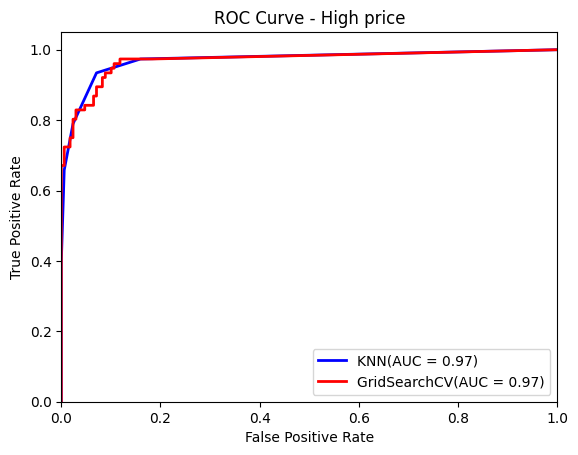

In [81]:
# Choose Low-rated as the positive class
pos_class = "high" 

# Combine the other two classes into a single negative class
neg_class = "low"

# Convert labels to binary format
y_train_bin = (Y_train == pos_class).astype(int)
y_test_bin = (Y_test == pos_class).astype(int)

plt.figure()
for model, model_name, color in zip(models, model_names, colors):
    # Train a classifier on the training data
    model.fit(X_train, y_train_bin)
    
    # Make predictions on the test data
    y_pred = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and area under the curve (AUC)
    fpr, tpr, _ = roc_curve(y_test_bin, y_pred)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, color=color, lw=2, label= model_name +'(AUC = %0.2f)' % roc_auc)
    

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - High price')
plt.legend(loc="lower right")
plt.show()

In [82]:
# Exporting the data to other files (decision trees...)
import pickle

with open('data.pkl', 'wb') as f:
    pickle.dump((X_train, X_test, Y_train, Y_test), f)